In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
#Importing the dataset
%%bigquery df --project trans-falcon-383013
SELECT 
  *
FROM `trans-falcon-383013.project.num_doctors`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filtered_df = df.loc[(df['sector'] == "Public") & (df['year'] > 2009)]
grouped_df = filtered_df.groupby(['year'])['count'].sum().reset_index()
print(grouped_df)

   year  count
0  2010   5180
1  2011   5621
2  2012   6131
3  2013   6661
4  2014   7330
5  2015   7909
6  2016   8358
7  2017   8573
8  2018   8819
9  2019   9030


In [ ]:


# Assuming you have a pandas DataFrame called 'df' containing the data you provided
X = grouped_df[['year']] # Features
y = grouped_df['count'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Predict the number of doctors for a given year
year = [[2023]]
predicted_num_doctors = regressor.predict(year)
print("Predicted number of doctors for 2023:", predicted_num_doctors[0])


Mean Squared Error: 21619.112691047332
R-squared: 0.9880315109198691
Predicted number of doctors for 2023: 11282.594911937369


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


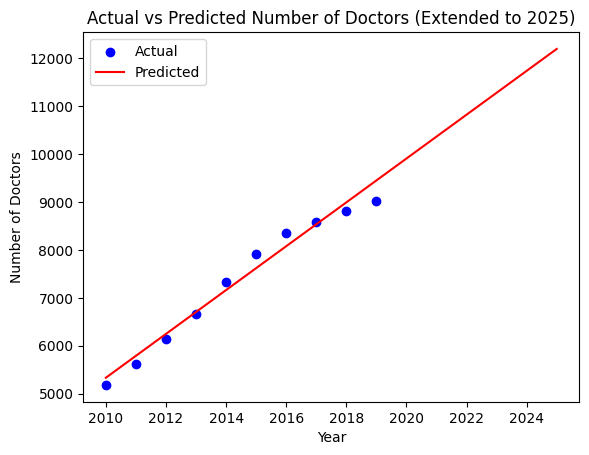

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an extended range of financial years until 2025
extended_years = np.arange(2010, 2026).reshape(-1, 1)

# Predict the government health expenditure for the extended range
y_pred_extended = regressor.predict(extended_years)

# Plot the actual values
plt.scatter(X, y, color='blue', label='Actual')

# Plot the predicted line
plt.plot(extended_years, y_pred_extended, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Year')
plt.ylabel('Number of Doctors')
plt.legend()
plt.title('Actual vs Predicted Number of Doctors (Extended to 2025)')

# Show the plot
plt.show()